In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from scipy.stats import skew

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("salary.csv")

In [3]:
df.shape

(1032, 16)

In [4]:
df.head()

,Unnamed: 0,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             1032 non-null   int64 
 1   Workclass       1032 non-null   object
 2   fnlwgt          1032 non-null   int64 
 3   education       1032 non-null   object
 4   education-num   1032 non-null   int64 
 5   marital-status  1032 non-null   object
 6   occupation      1032 non-null   object
 7   relationship    1032 non-null   object
 8   race            1032 non-null   object
 9   sex             1032 non-null   object
 10  capital-gain    1032 non-null   int64 
 11  capital-loss    1032 non-null   int64 
 12  hours-per-week  1032 non-null   int64 
 13  native-country  1032 non-null   object
 14  Income          1032 non-null   int64 
dtypes: int64(7), object(8)
memory usage: 121.1+ KB


In [7]:
df_num = df.select_dtypes("int64").drop("Income",axis=1)
df_cat = df.select_dtypes("object")

In [8]:
df_num.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [9]:
df_num.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,1032.000000,1.032000e+03,1032.000000,1032.00000,1032.000000,1032.000000
mean,37.954457,1.918318e+05,10.221899,560.19186,102.870155,40.706395
std,12.825353,1.074243e+05,2.501636,2406.47961,432.251488,11.736603
min,17.000000,2.117400e+04,1.000000,0.00000,0.000000,1.000000
25%,28.000000,1.155792e+05,9.000000,0.00000,0.000000,40.000000
50%,37.000000,1.807065e+05,10.000000,0.00000,0.000000,40.000000
75%,46.000000,2.461932e+05,13.000000,0.00000,0.000000,45.000000
max,90.000000,1.033222e+06,16.000000,25236.00000,2415.000000,99.000000


age - 0.6160534414050984


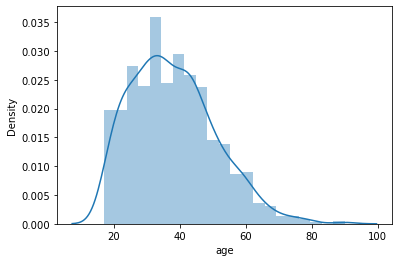

fnlwgt - 1.3937557919747436


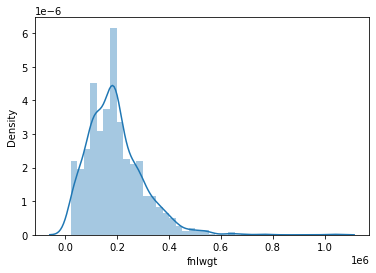

education-num - -0.30220179407263364


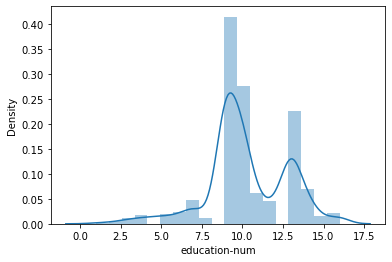

capital-gain - 5.409818233508558


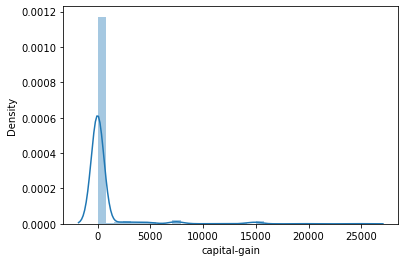

capital-loss - 4.071696903313479


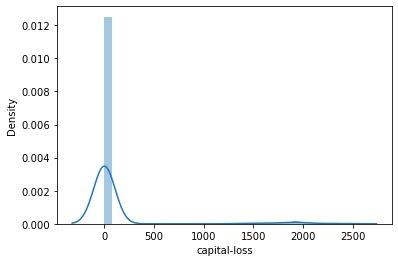

hours-per-week - 0.16318627165535773


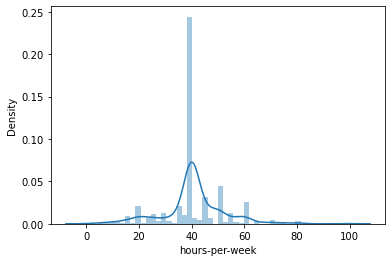

In [10]:
for col in df_num:
    print(col,"-",skew(df_num[col]))
    plt.figure()
    sns.distplot(df_num[col])
    plt.show()

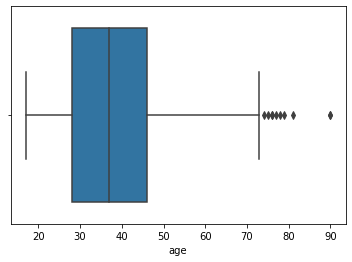

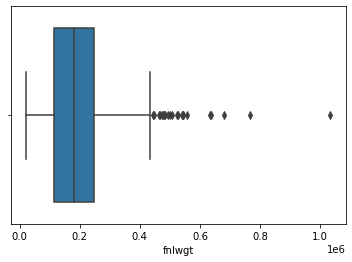

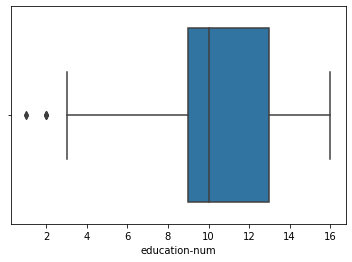

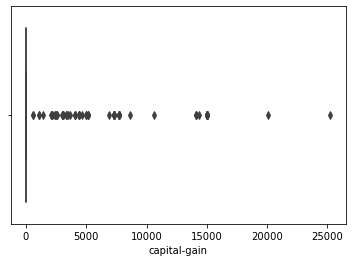

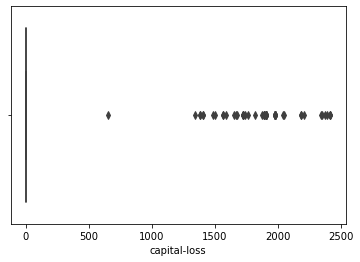

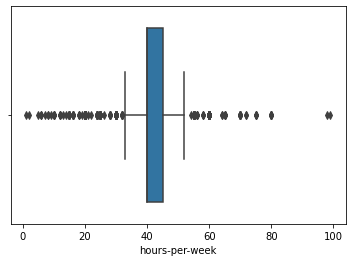

In [11]:
for col in df_num:
    plt.figure()
    sns.boxplot(df_num[col])
    plt.show()

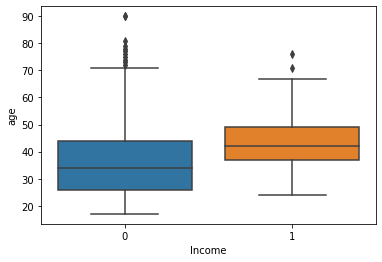

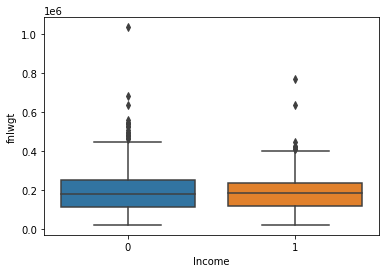

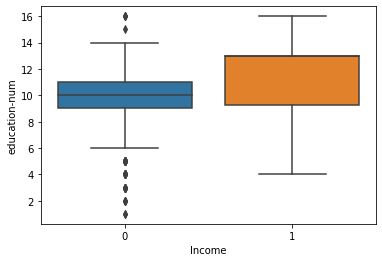

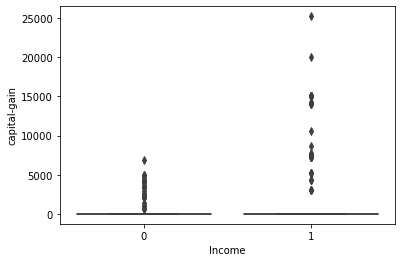

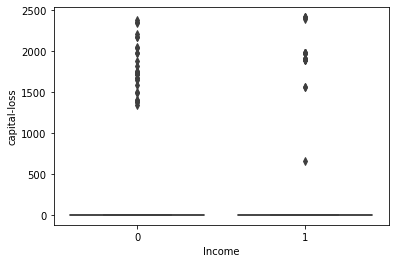

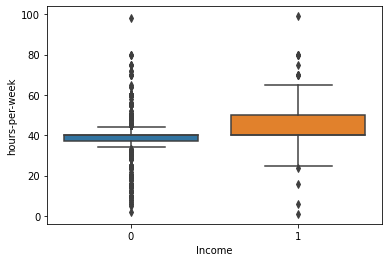

In [12]:
# bivariate analysis
for col in df_num:
    plt.figure()
    sns.boxplot(data=df, x="Income", y=col)
    plt.show()

In [13]:
df_cat.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


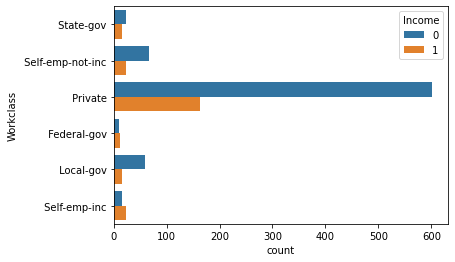

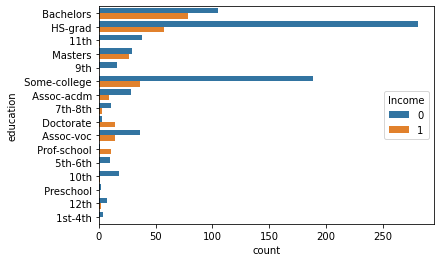

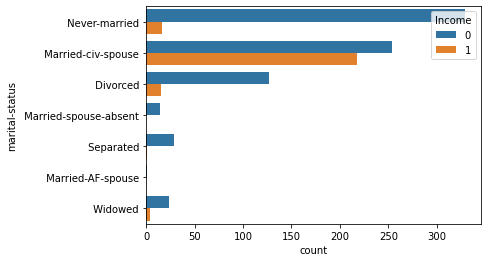

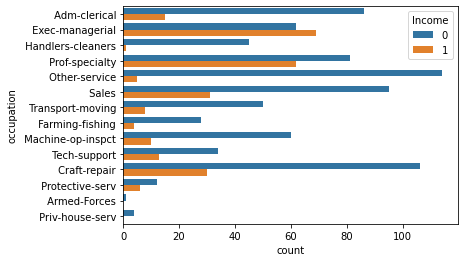

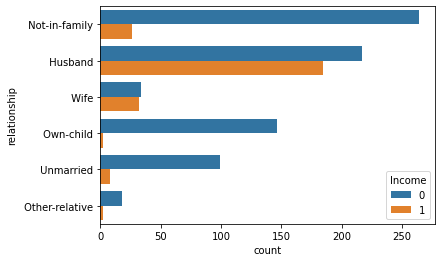

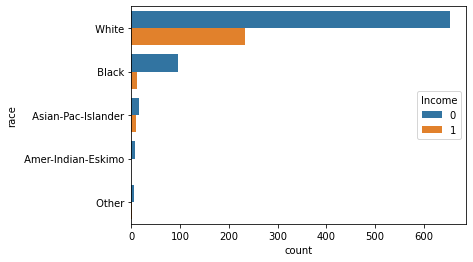

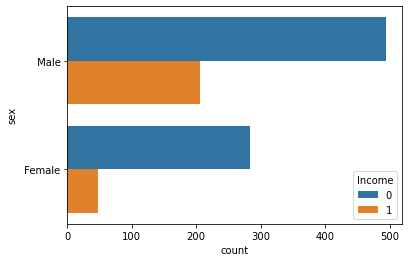

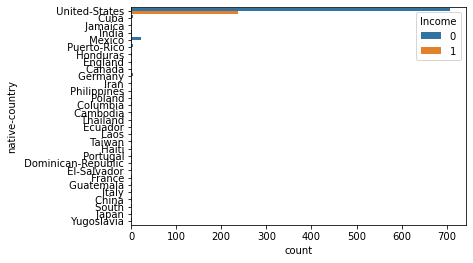

In [14]:
for col in df_cat:
    plt.figure()
    sns.countplot(data=df, y=col, hue="Income")
    plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [17]:
df_cat.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,5,9,4,0,1,4,1,28
1,4,9,2,3,0,4,1,28
2,2,11,0,5,1,4,1,28
3,2,1,2,5,0,2,1,28
4,2,9,2,9,5,2,0,4


In [18]:
X = pd.concat([df_num,df_cat],axis=1)

In [19]:
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,39,77516,13,2174,0,40,5,9,4,0,1,4,1,28
1,50,83311,13,0,0,13,4,9,2,3,0,4,1,28
2,38,215646,9,0,0,40,2,11,0,5,1,4,1,28
3,53,234721,7,0,0,40,2,1,2,5,0,2,1,28
4,28,338409,13,0,0,40,2,9,2,9,5,2,0,4


In [20]:
y = df["Income"]

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [22]:
#baseline model

In [23]:
lr = LogisticRegression()

In [24]:
lr.fit(X_train,y_train)

LogisticRegression()

In [25]:
y_pred = lr.predict(X_test)

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       238
           1       0.68      0.26      0.38        72

    accuracy                           0.80       310
   macro avg       0.75      0.61      0.63       310
weighted avg       0.78      0.80      0.76       310



In [28]:
df_num.drop(["capital-gain","capital-loss"],axis=1,inplace=True)
df_cat.drop("native-country",axis=1,inplace=True)

In [29]:
df_num[df_num["age"] == 90]

,age,fnlwgt,education-num,hours-per-week
206,90,51744,9,40
956,90,137018,9,40


In [30]:
df_num[df_num["fnlwgt"] > 1000000]

,age,fnlwgt,education-num,hours-per-week
384,31,1033222,10,40


In [31]:
df_num[df_num["hours-per-week"] > 95]

,age,fnlwgt,education-num,hours-per-week
251,50,30653,14,98
860,37,176900,9,99


In [32]:
df_num.drop([206,956,384,251,860],inplace=True)
df_cat.drop([206,956,384,251,860],inplace=True)
y.drop([206,956,384,251,860],inplace=True)

In [33]:
for col in df_num:
    if skew(df_num[col]) > 0.5 or skew(df_num[col]) < -0.5:
        df_num[col] = np.sqrt(df_num[col])

In [34]:
X = pd.concat([df_num,df_cat],axis=1)

In [35]:
X.head()

,age,fnlwgt,education-num,hours-per-week,Workclass,education,marital-status,occupation,relationship,race,sex
0,6.244998,278.416954,13,40,5,9,4,0,1,4,1
1,7.071068,288.636450,13,13,4,9,2,3,0,4,1
2,6.164414,464.377002,9,40,2,11,0,5,1,4,1
3,7.280110,484.480134,7,40,2,1,2,5,0,2,1
4,5.291503,581.729318,13,40,2,9,2,9,5,2,0


In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [37]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [38]:
lr = LogisticRegression()

In [39]:
lr.fit(X_train_ss,y_train)

LogisticRegression()

In [40]:
y_pred = lr.predict(X_test_ss)

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       232
           1       0.64      0.35      0.45        77

    accuracy                           0.79       309
   macro avg       0.73      0.64      0.66       309
weighted avg       0.77      0.79      0.77       309



In [42]:
# filter model - chi2 & anova

from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

In [43]:
anova_test = SelectKBest(score_func=f_regression,k=9)
X_train_anova = anova_test.fit_transform(X_train_ss,y_train)
X_test_anova = anova_test.transform(X_test_ss)

In [44]:
X_train.shape

(718, 11)

In [45]:
lr = LogisticRegression()

In [46]:
lr.fit(X_train_anova,y_train)

LogisticRegression()

In [47]:
y_pred = lr.predict(X_test_anova)

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       232
           1       0.69      0.40      0.51        77

    accuracy                           0.81       309
   macro avg       0.76      0.67      0.69       309
weighted avg       0.79      0.81      0.79       309



In [49]:
columns = []
for col in X:
    columns.append(col)
    
    X_new = X[columns]
    
    X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.3,random_state=1)
    
    lr = LogisticRegression()
    
    lr.fit(X_train,y_train)
    
    r2 = lr.score(X_test,y_test)
            
    print("cols: ",col,"  -  r2 score: ",r2)
    

cols:  age   -  r2 score:  0.7411003236245954
cols:  fnlwgt   -  r2 score:  0.7411003236245954
cols:  education-num   -  r2 score:  0.7572815533980582
cols:  hours-per-week   -  r2 score:  0.7799352750809061
cols:  Workclass   -  r2 score:  0.7734627831715211
cols:  education   -  r2 score:  0.7799352750809061
cols:  marital-status   -  r2 score:  0.7508090614886731
cols:  occupation   -  r2 score:  0.7669902912621359
cols:  relationship   -  r2 score:  0.7799352750809061
cols:  race   -  r2 score:  0.7864077669902912
cols:  sex   -  r2 score:  0.7831715210355987


In [50]:
# PCA
from sklearn.decomposition import PCA

In [51]:
pc = PCA(n_components=4,random_state=1)

In [52]:
X_train_pc = pc.fit_transform(X_train,y_train)
X_test_pc = pc.transform(X_test)

In [53]:
lr = LogisticRegression()
lr.fit(X_train_pc,y_train)

LogisticRegression()

In [54]:
lr.score(X_test_pc,y_test)

0.7702265372168284